In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/Kangaroo.csv")

In [3]:
df_cleaned = df.drop(columns=["Unnamed: 0", "url"])
str_cols = df_cleaned.select_dtypes(include='object').columns #Selects columns that are of type string or mixed object
for col in str_cols:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

df_cleaned.describe(include='all') # Summary statistics of the data


,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
count,8.036800e+04,80368,80368,73558.000000,66672.000000,80368,80368,80368.000000,67783.000000,21948.000000,...,10387,55094.00000,1816,3044,47429,28599.000000,11262,0.0,65391,7.637000e+04
unique,NaN,4,26,NaN,NaN,11,5470,NaN,NaN,NaN,...,1,NaN,1,1,1,NaN,8,NaN,20,NaN
top,NaN,HOUSE,HOUSE,NaN,NaN,West Flanders,Antwerpen,NaN,NaN,NaN,...,True,NaN,True,True,True,NaN,SOUTH,NaN,B,NaN
freq,NaN,45234,33977,NaN,NaN,15515,1665,NaN,NaN,NaN,...,10387,NaN,1816,3044,47429,NaN,3143,NaN,13243,NaN
mean,1.952922e+07,NaN,NaN,3.008877,1.427121,NaN,NaN,5266.587199,178.499993,7.110443,...,NaN,1.80624,NaN,NaN,NaN,24.512710,NaN,NaN,NaN,4.476061e+05
std,2.897688e+06,NaN,NaN,1.833185,4.556189,NaN,NaN,3045.698904,820.878936,5.824088,...,NaN,8.41452,NaN,NaN,NaN,43.244643,NaN,NaN,NaN,5.115757e+05
min,1.882546e+06,NaN,NaN,1.000000,1.000000,NaN,NaN,1000.000000,6.000000,1.000000,...,NaN,1.00000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,3.141000e+03
25%,2.035055e+07,NaN,NaN,2.000000,1.000000,NaN,NaN,2330.000000,93.000000,1.000000,...,NaN,1.00000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,2.300000e+05
50%,2.052985e+07,NaN,NaN,3.000000,1.000000,NaN,NaN,4830.000000,140.000000,6.000000,...,NaN,2.00000,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,3.299000e+05
75%,2.061494e+07,NaN,NaN,4.000000,2.000000,NaN,NaN,8420.000000,200.000000,11.000000,...,NaN,2.00000,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,4.790000e+05


In [4]:
#  Percentage of missing values
missing_percent = df_cleaned.isnull().mean().sort_values(ascending=False) * 100
missing_percent

monthlyCost                 100.000000
accessibleDisabledPeople    100.000000
hasBalcony                  100.000000
hasAirConditioning           98.601433
hasSwimmingPool              97.740394
hasDressingRoom              96.730042
hasFireplace                 96.212423
hasThermicPanels             96.127812
hasArmoredDoor               95.398666
gardenOrientation            93.030808
diningRoomSurface            91.413249
hasHeatPump                  90.701523
hasPhotovoltaicPanels        89.986064
hasOffice                    87.075702
terraceOrientation           85.986960
hasAttic                     84.426637
hasDiningRoom                82.404688
streetFacadeWidth            80.701274
hasGarden                    80.143838
gardenSurface                80.143838
hasVisiophone                80.102777
parkingCountOutdoor          77.197392
hasLift                      76.304002
roomCount                    72.690623
kitchenSurface               69.810123
parkingCountIndoor       

In [5]:
#Delete all rows wihout price
df_cleaned = df_cleaned.dropna(subset=['price'])

In [6]:
df_cleaned.shape

(76370, 51)

In [7]:
df_cleaned.head(10)

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,NaN,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0
5,20639359.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,ETTERBEEK,1040,90.0,NaN,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,D,375000.0
6,20634658.0,APARTMENT,DUPLEX,3.0,2.0,Brussels,Etterbeek,1040,220.0,NaN,...,True,4.0,NaN,NaN,True,25.0,SOUTH_WEST,NaN,D,950000.0
7,20634657.0,APARTMENT,DUPLEX,3.0,2.0,Brussels,Etterbeek,1040,220.0,NaN,...,True,4.0,NaN,NaN,True,25.0,SOUTH_WEST,NaN,D,950000.0
8,20634655.0,APARTMENT,DUPLEX,2.0,1.0,Brussels,Etterbeek,1040,187.0,NaN,...,True,2.0,NaN,NaN,True,25.0,SOUTH_WEST,NaN,C,795000.0
9,20651309.0,APARTMENT,APARTMENT,1.0,1.0,Brussels,Etterbeek,1040,93.0,NaN,...,NaN,1.0,NaN,NaN,True,5.0,EAST,NaN,F,297000.0


### Remove columns with more than 90% missing but still keep swimmingpool 

In [8]:
important_sparse = ['hasSwimmingPool'] 
columns_to_drop = missing_percent[
    (missing_percent > 90) & (~missing_percent.index.isin(important_sparse))
].index

df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [9]:
df_cleaned.shape

(76370, 40)

In [10]:
df_cleaned.head()

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,parkingCountOutdoor,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasTerrace,terraceSurface,terraceOrientation,epcScore,price
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,NaN,True,NaN,1.0,NaN,True,7.0,NaN,C,399000.0
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,NaN,NaN,True,3.0,NaN,True,1.0,NaN,E,895000.0
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,NaN,NaN,NaN,1.0,NaN,True,2.0,NaN,F,465000.0
3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,NaN,...,NaN,True,NaN,2.0,NaN,True,3.0,NaN,B,590000.0
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,E,289000.0


In [11]:
#Compute Pearson correlation of every numeric column with price
corr_with_price = df_cleaned.corr(numeric_only=True)['price'].sort_values(ascending=False)

# View top positive and negative correlations
print("Top positive correlations:\n", corr_with_price.head(10))
print("\nTop negative correlations:\n", corr_with_price.tail(10))

Top positive correlations:
 price               1.000000
bedroomCount        0.377437
terraceSurface      0.236967
landSurface         0.226146
facedeCount         0.167203
bathroomCount       0.111059
gardenSurface       0.099387
habitableSurface    0.097872
toiletCount         0.095787
roomCount           0.088276
Name: price, dtype: float64

Top negative correlations:
 roomCount                   0.088276
buildingConstructionYear    0.032558
livingRoomSurface           0.031861
kitchenSurface              0.021199
streetFacadeWidth           0.009624
parkingCountOutdoor         0.008926
floorCount                 -0.001798
parkingCountIndoor         -0.002719
postCode                   -0.042046
id                         -0.051982
Name: price, dtype: float64


In [12]:
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# 2) Compute the correlation matrix
corr_matrix = numeric_df.corr()

In [13]:

#plt.figure(figsize=(12,10))
#sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
#plt.title("Correlation Matrix")
#plt.show()

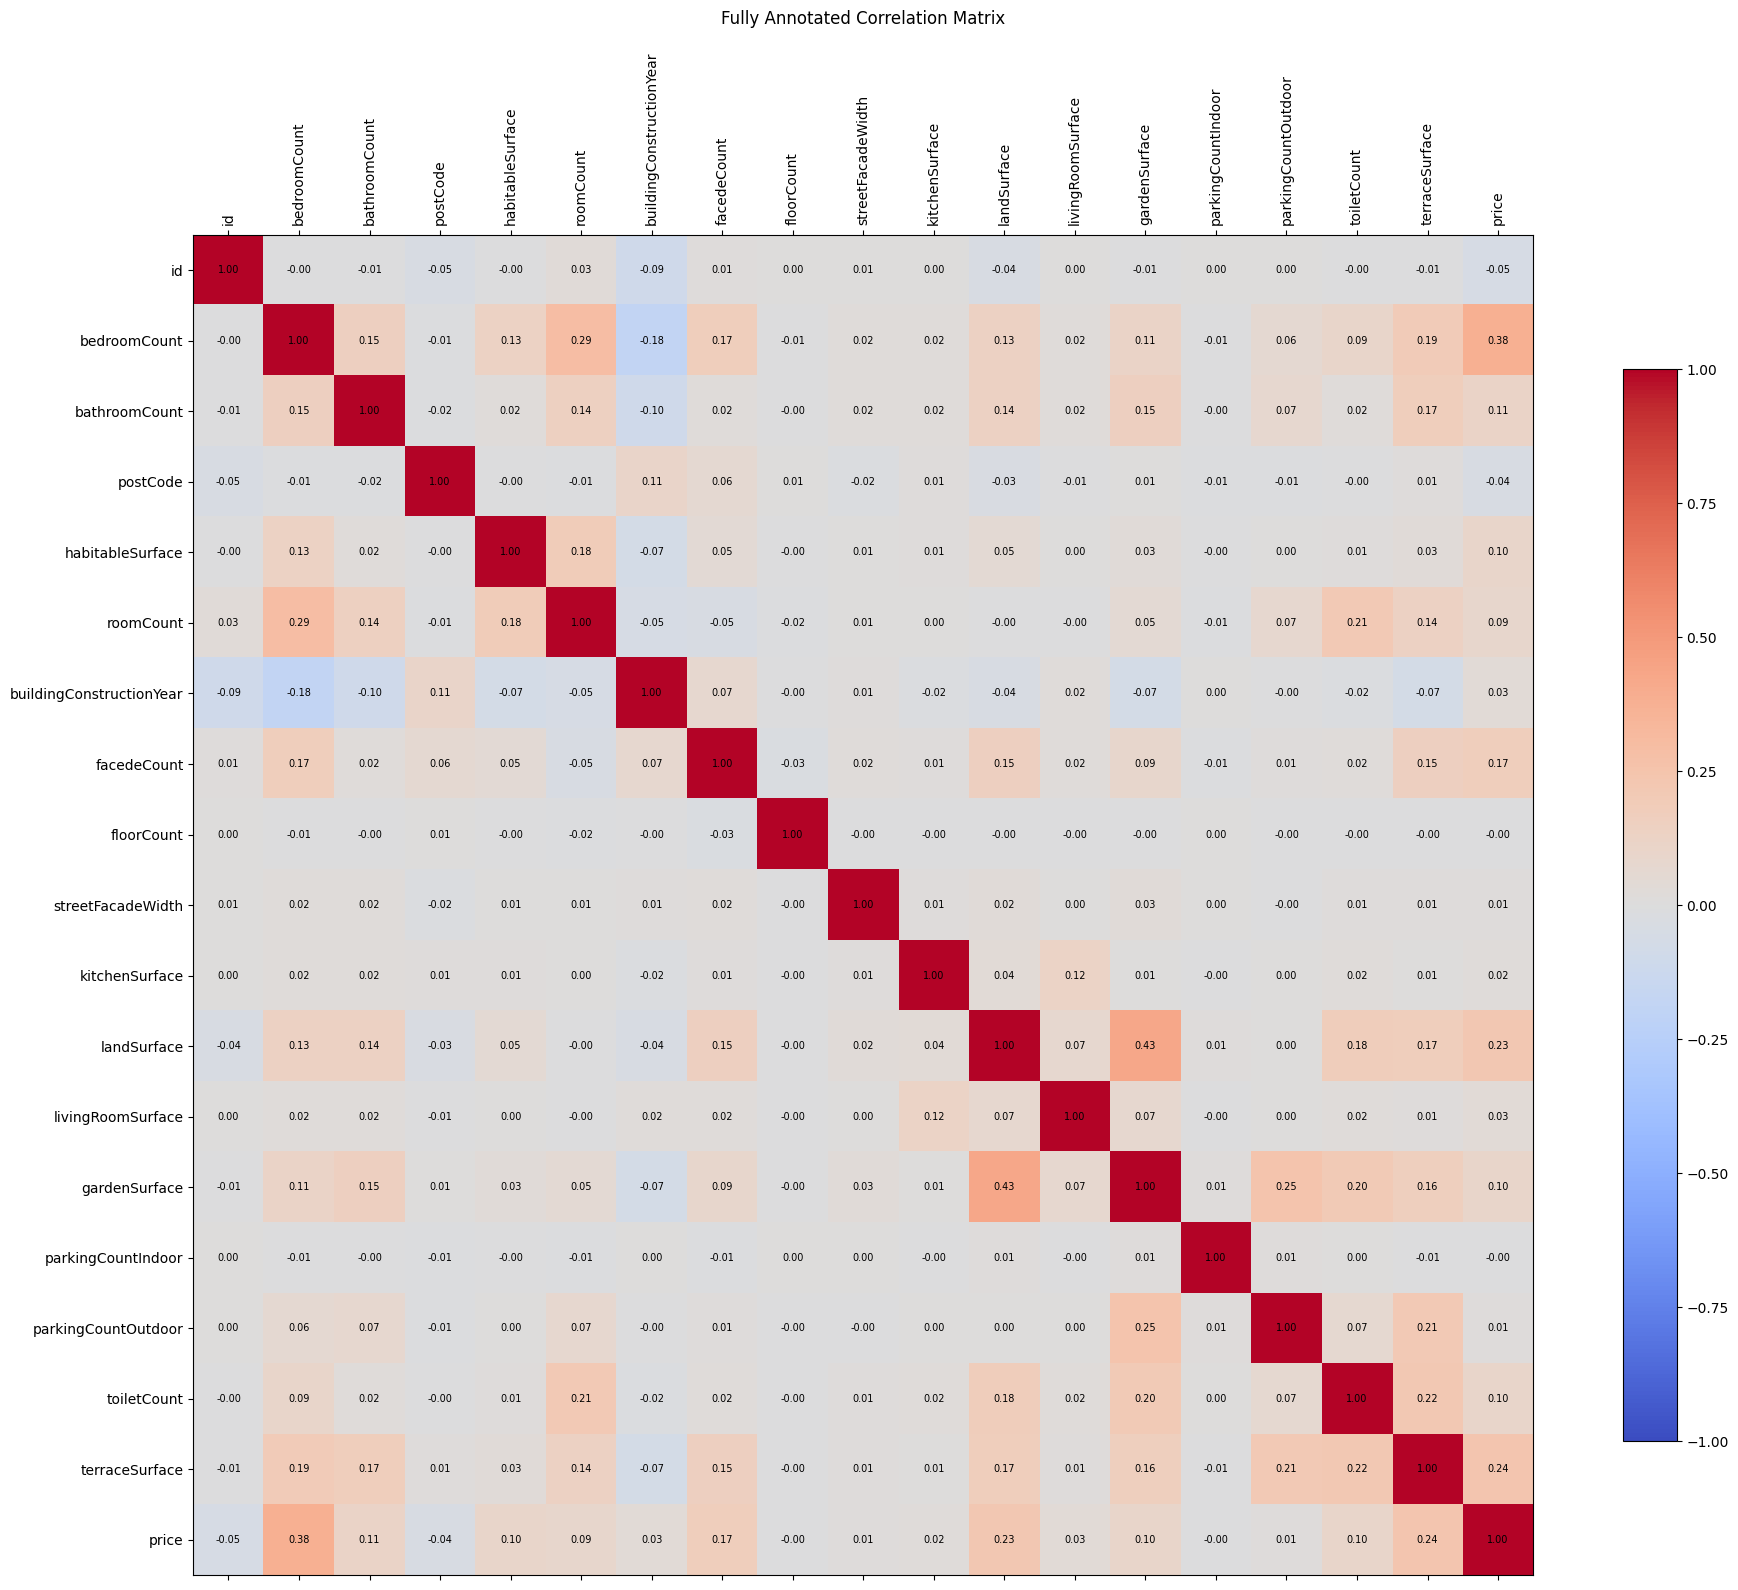

In [14]:
fig, ax = plt.subplots(figsize=(20,16))
cax = ax.matshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, shrink=0.8)

# tick labels
ticks = np.arange(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# manual annotation loop
for (i, j), val in np.ndenumerate(corr_matrix.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=7)

plt.title("Fully Annotated Correlation Matrix", pad=20)
plt.tight_layout()
plt.show()

In [15]:
#  Percentage of missing values
missing_percent = df_cleaned.isnull().mean().sort_values(ascending=False) * 100
missing_percent

hasSwimmingPool             97.622103
hasPhotovoltaicPanels       89.461831
hasOffice                   86.401728
terraceOrientation          85.253372
hasAttic                    83.613985
hasDiningRoom               81.486186
streetFacadeWidth           79.690978
hasGarden                   79.105670
gardenSurface               79.105670
hasVisiophone               79.061150
parkingCountOutdoor         76.306141
hasLift                     75.064816
roomCount                   71.262276
kitchenSurface              68.232290
parkingCountIndoor          63.594343
terraceSurface              62.553359
livingRoomSurface           62.096373
hasBasement                 61.617127
floorCount                  50.840644
landSurface                 48.229671
kitchenType                 45.119811
hasLivingRoom               43.865392
floodZoneType               43.820872
heatingType                 38.261097
hasTerrace                  37.898389
buildingConstructionYear    35.705120
facedeCount 

In [16]:
df_solar = df_cleaned.copy()
df_solar['hasPhotovoltaicPanels'] = df_solar['hasPhotovoltaicPanels'].fillna(0)

# Group by 0 and 1
df_solar.groupby('hasPhotovoltaicPanels')['price'].mean()

hasPhotovoltaicPanels
0       440989.548623
True    503775.658673
Name: price, dtype: float64

In [18]:
from scipy.stats import ttest_ind

has_solar = df_solar[df_solar['hasPhotovoltaicPanels'] == 1]['price']
no_solar = df_solar[df_solar['hasPhotovoltaicPanels'] == 0]['price']

t_stat, p_value = ttest_ind(has_solar, no_solar, equal_var=False, nan_policy='omit')
print(f"T-test p-value: {p_value}")

T-test p-value: 3.946746655495818e-45


In [19]:
top_10_1 = df_cleaned[df['price'] >= df_cleaned['price'].quantile(0.90)]
top_10_1['hasOffice'].value_counts(dropna=False)

C:\Users\BeCode\AppData\Local\Temp\ipykernel_9324\1556537075.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_10_1 = df_cleaned[df['price'] >= df_cleaned['price'].quantile(0.90)]


hasOffice
NaN     5305
True    2366
Name: count, dtype: int64

In [20]:
most_influential = corr_with_price.abs().sort_values(ascending=False).index[1:7]
least_influential = corr_with_price.abs().sort_values(ascending=True).index[:7]

print("Top 7 most influential:", most_influential.tolist())
print("Top 7 least influential:", least_influential.tolist())

Top 7 most influential: ['bedroomCount', 'terraceSurface', 'landSurface', 'facedeCount', 'bathroomCount', 'gardenSurface']
Top 7 least influential: ['floorCount', 'parkingCountIndoor', 'parkingCountOutdoor', 'streetFacadeWidth', 'kitchenSurface', 'livingRoomSurface', 'buildingConstructionYear']


In [21]:
#Quantitative = numeric types
quant_cols = df_cleaned.select_dtypes(include=['number']).columns.tolist()
# Qualitative = object / category types
qual_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Quantitative ({len(quant_cols)}): {quant_cols}")
print(f"Qualitative ({len(qual_cols)}): {qual_cols}")

Quantitative (19): ['id', 'bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface', 'roomCount', 'buildingConstructionYear', 'facedeCount', 'floorCount', 'streetFacadeWidth', 'kitchenSurface', 'landSurface', 'livingRoomSurface', 'gardenSurface', 'parkingCountIndoor', 'parkingCountOutdoor', 'toiletCount', 'terraceSurface', 'price']
Qualitative (21): ['type', 'subtype', 'province', 'locality', 'hasAttic', 'hasBasement', 'hasDiningRoom', 'buildingCondition', 'hasLift', 'floodZoneType', 'heatingType', 'hasPhotovoltaicPanels', 'kitchenType', 'hasLivingRoom', 'hasGarden', 'hasVisiophone', 'hasOffice', 'hasSwimmingPool', 'hasTerrace', 'terraceOrientation', 'epcScore']


### plot data
1. Price Distribution: To understand price spread and detect outliers

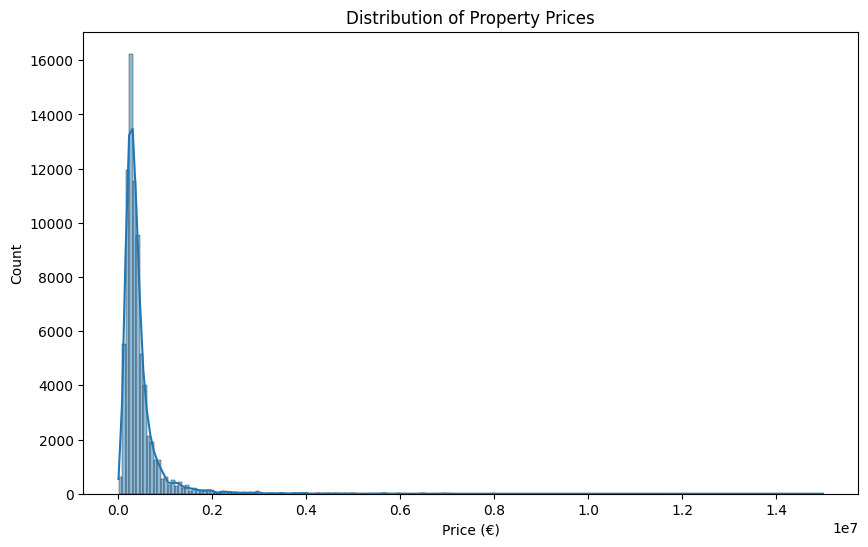

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['price'], bins=200, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.show()

2.  Boxplot: Price by Property Type

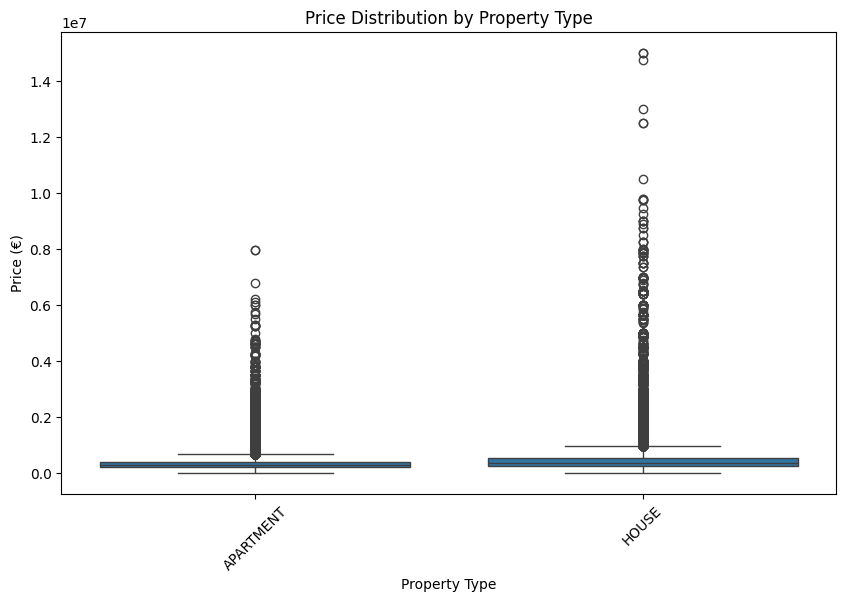

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='price', data=df_cleaned)
plt.title("Price Distribution by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price (€)")
plt.xticks(rotation=45)
plt.show()

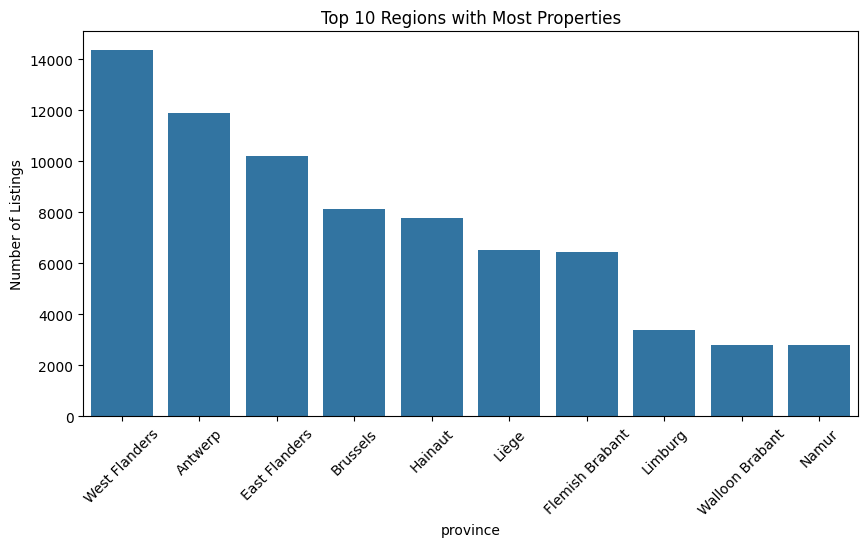

In [33]:
top_province = df_cleaned['province'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_province.index, y=top_province.values)
plt.title("Top 10 Regions with Most Properties")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

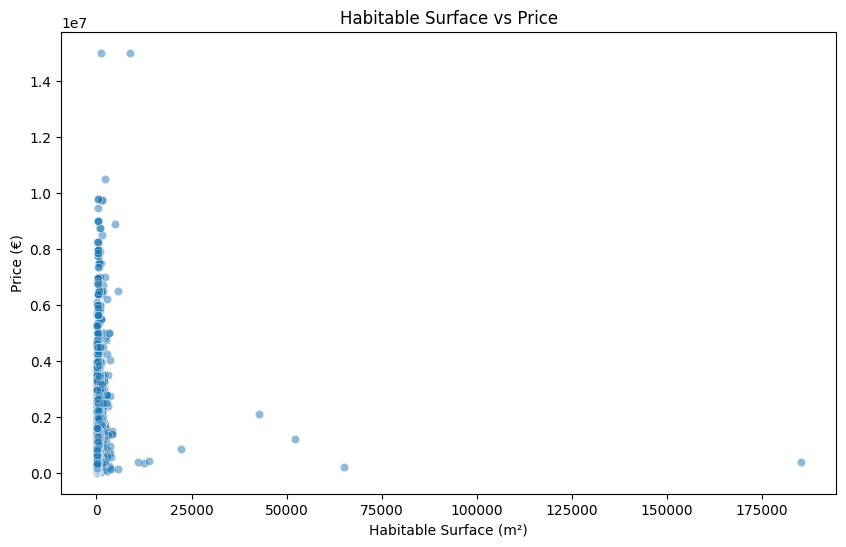

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='habitableSurface', y='price', data=df_cleaned, alpha=0.5)
plt.title("Habitable Surface vs Price")
plt.xlabel("Habitable Surface (m²)")
plt.ylabel("Price (€)")
plt.show()

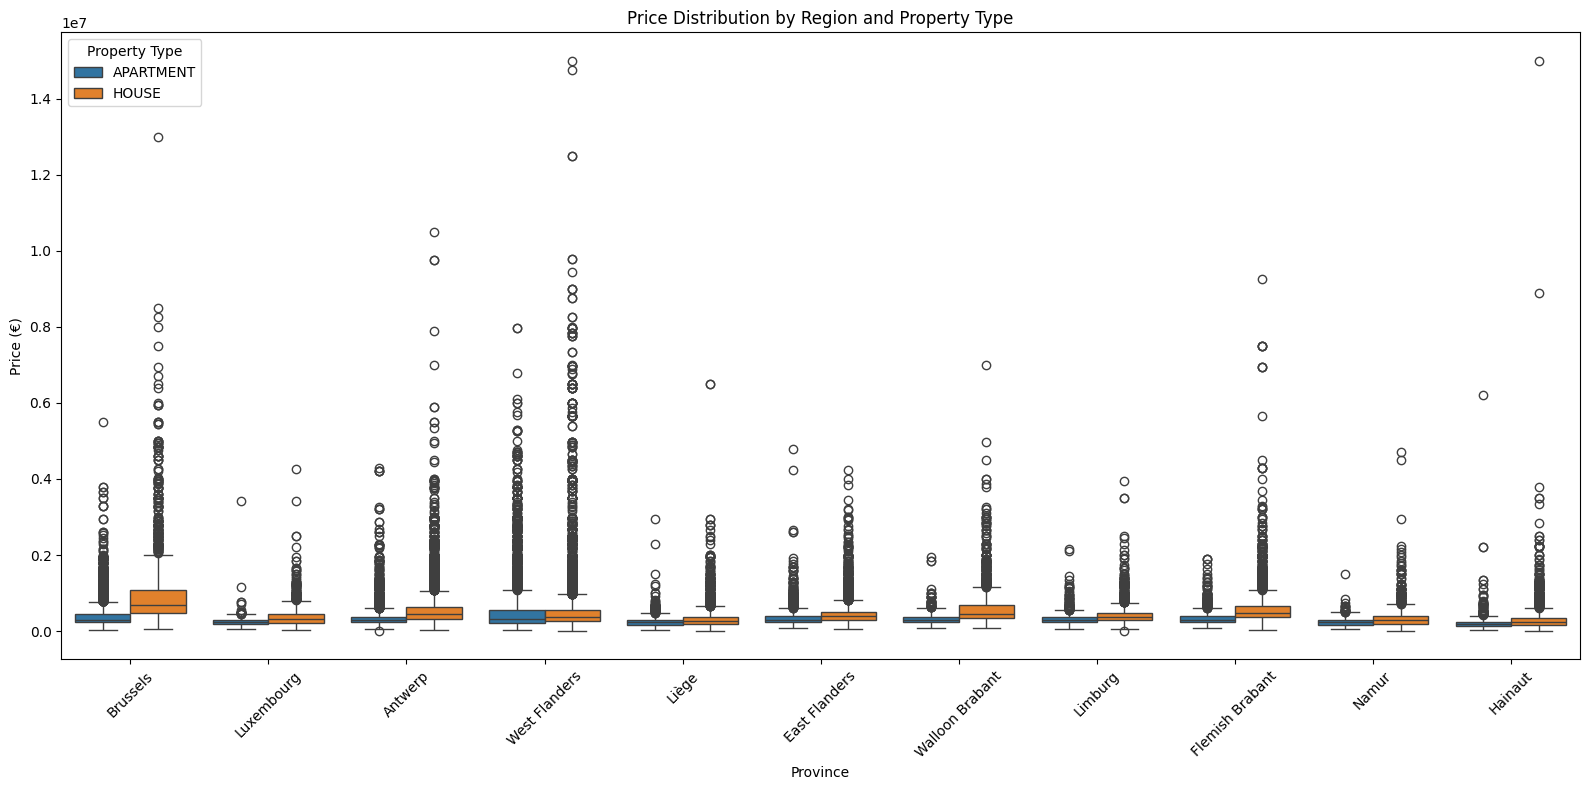

In [35]:
plt.figure(figsize=(16,8))
sns.boxplot(
    data=df_cleaned,
    x='province',        
    y='price',
    hue='type'  # this separates house and apartment
)
plt.title("Price Distribution by Region and Property Type")
plt.xlabel("Province")
plt.ylabel("Price (€)")
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

In [36]:
df_cleaned['province'].nunique()

11

C:\Users\BeCode\AppData\Local\Temp\ipykernel_9324\2518379791.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


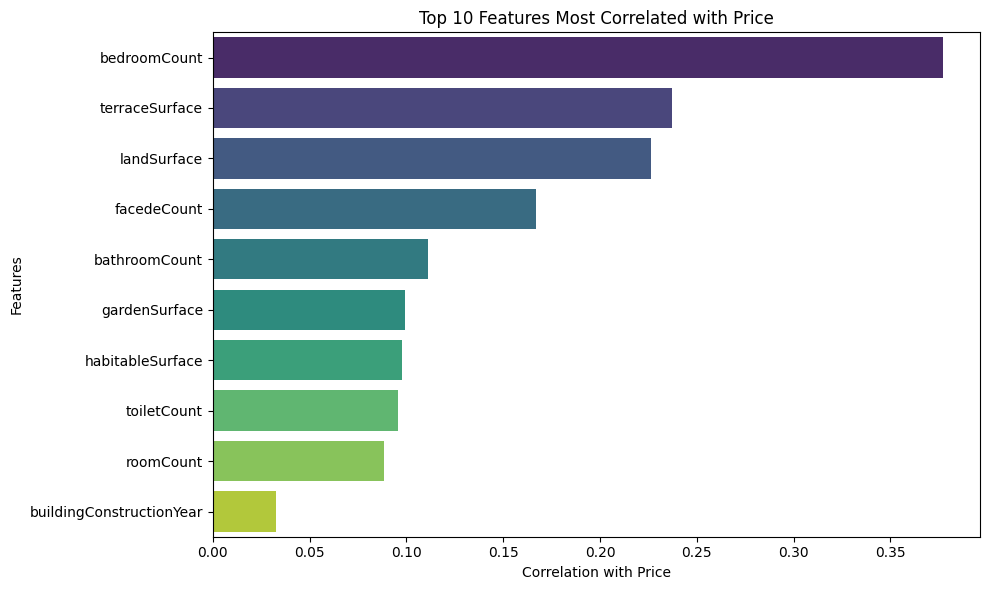

In [37]:
top_corr = corr_matrix['price'].drop('price').sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top 10 Features Most Correlated with Price')
plt.xlabel('Correlation with Price')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

C:\Users\BeCode\AppData\Local\Temp\ipykernel_9324\1595737562.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spearman.values, y=top_spearman.index, palette='magma')


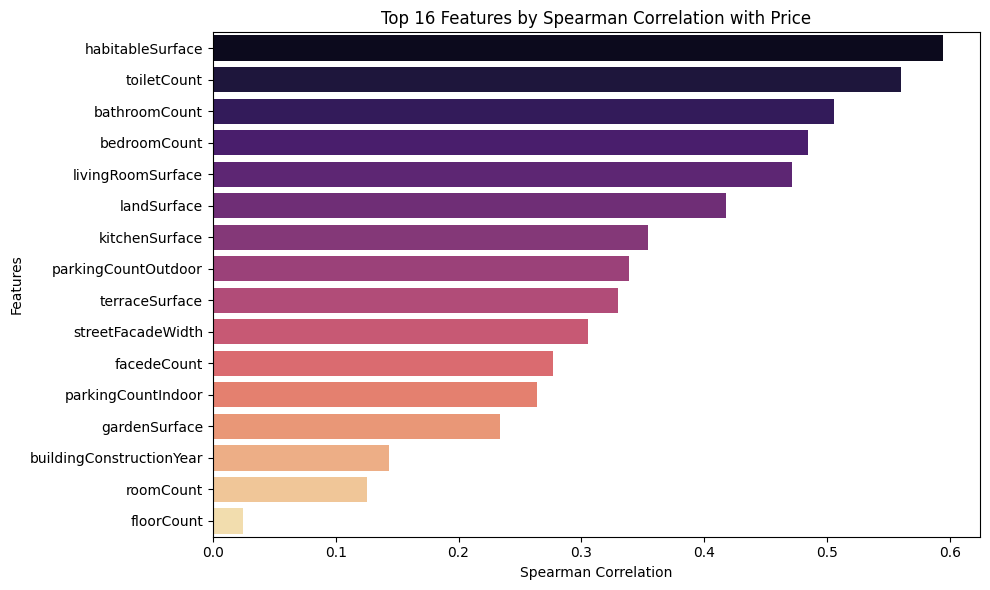

In [38]:
spearman_corr = numeric_df.corr(method='spearman')

# Top 7 features by Spearman correlation
top_spearman = spearman_corr['price'].drop('price').sort_values(ascending=False).head(16)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_spearman.values, y=top_spearman.index, palette='magma')
plt.title('Top 16 Features by Spearman Correlation with Price')
plt.xlabel('Spearman Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [39]:
df_cleaned.head()

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,parkingCountOutdoor,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasTerrace,terraceSurface,terraceOrientation,epcScore,price
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,NaN,True,NaN,1.0,NaN,True,7.0,NaN,C,399000.0
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,NaN,NaN,True,3.0,NaN,True,1.0,NaN,E,895000.0
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,NaN,NaN,NaN,1.0,NaN,True,2.0,NaN,F,465000.0
3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,NaN,...,NaN,True,NaN,2.0,NaN,True,3.0,NaN,B,590000.0
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,E,289000.0


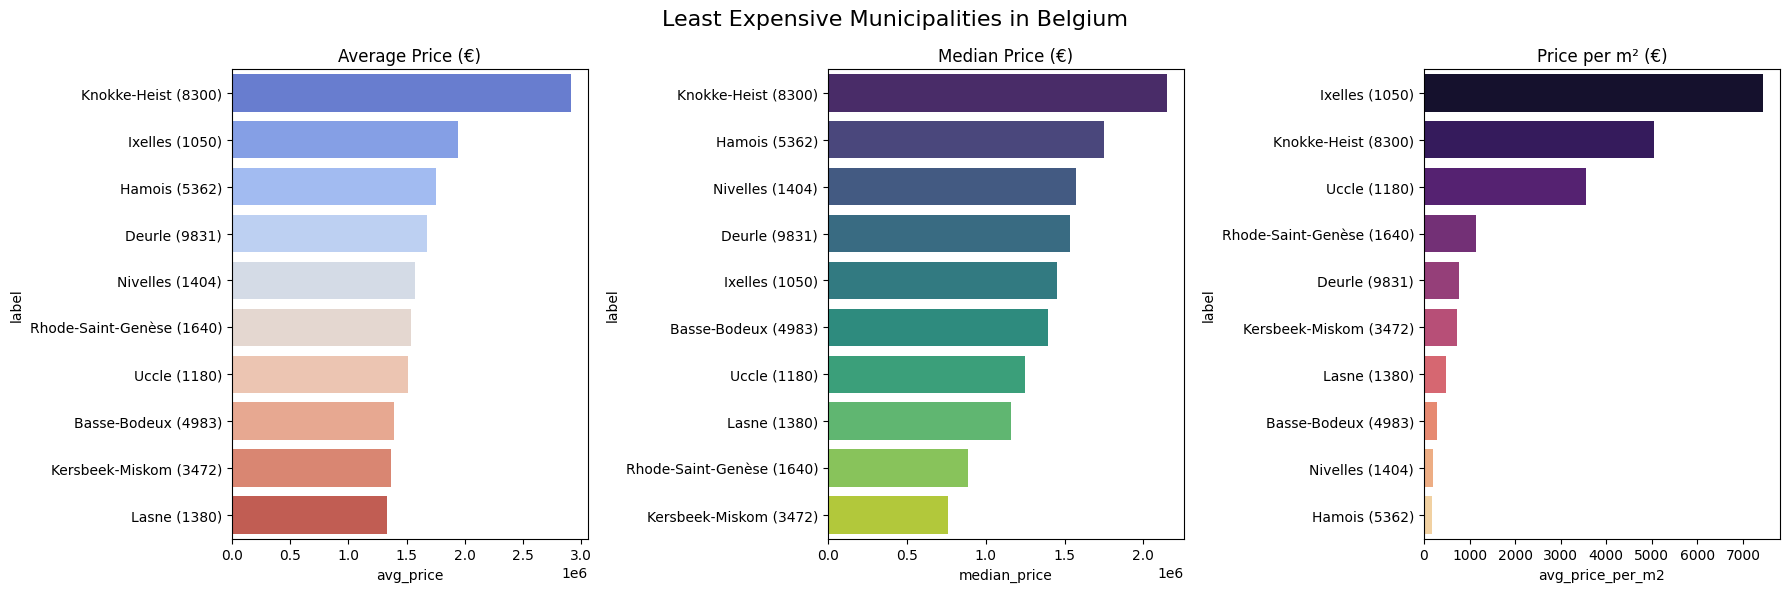

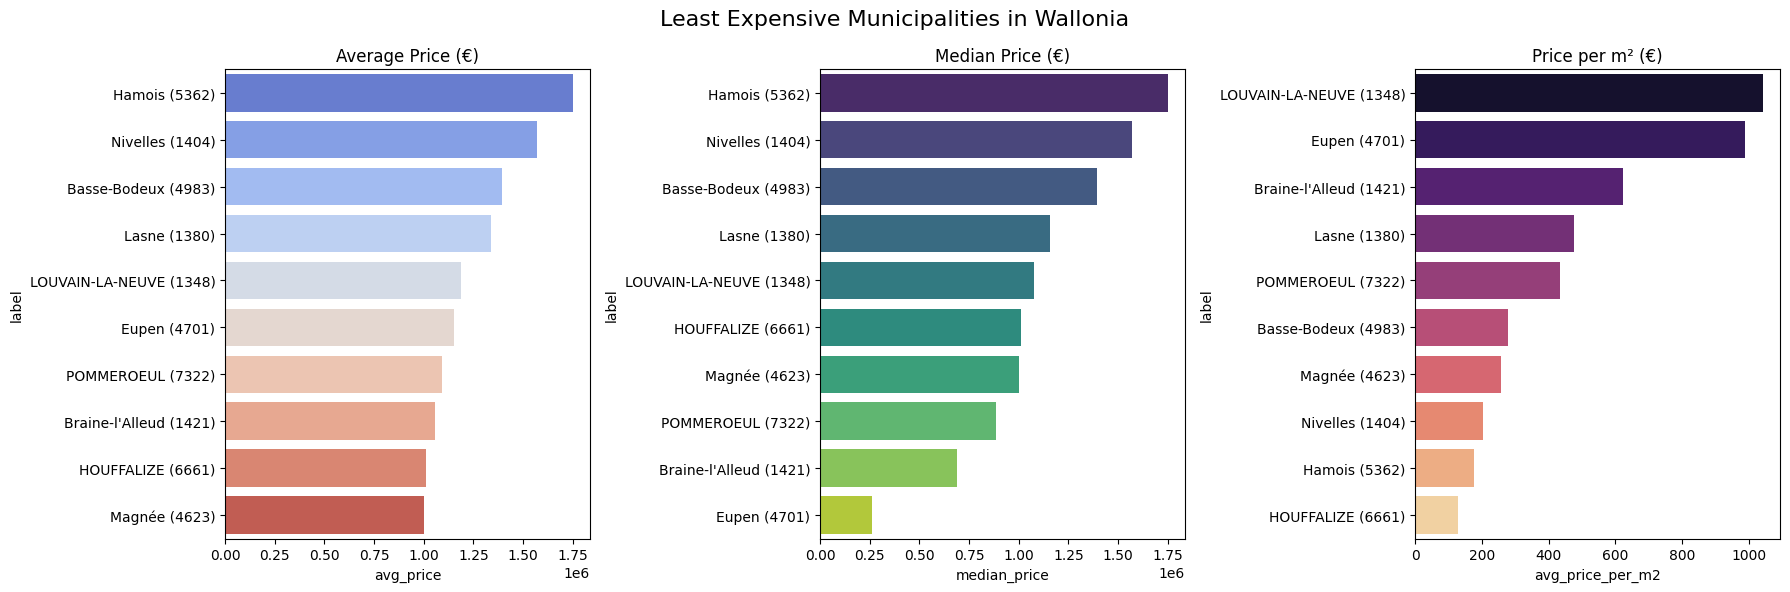

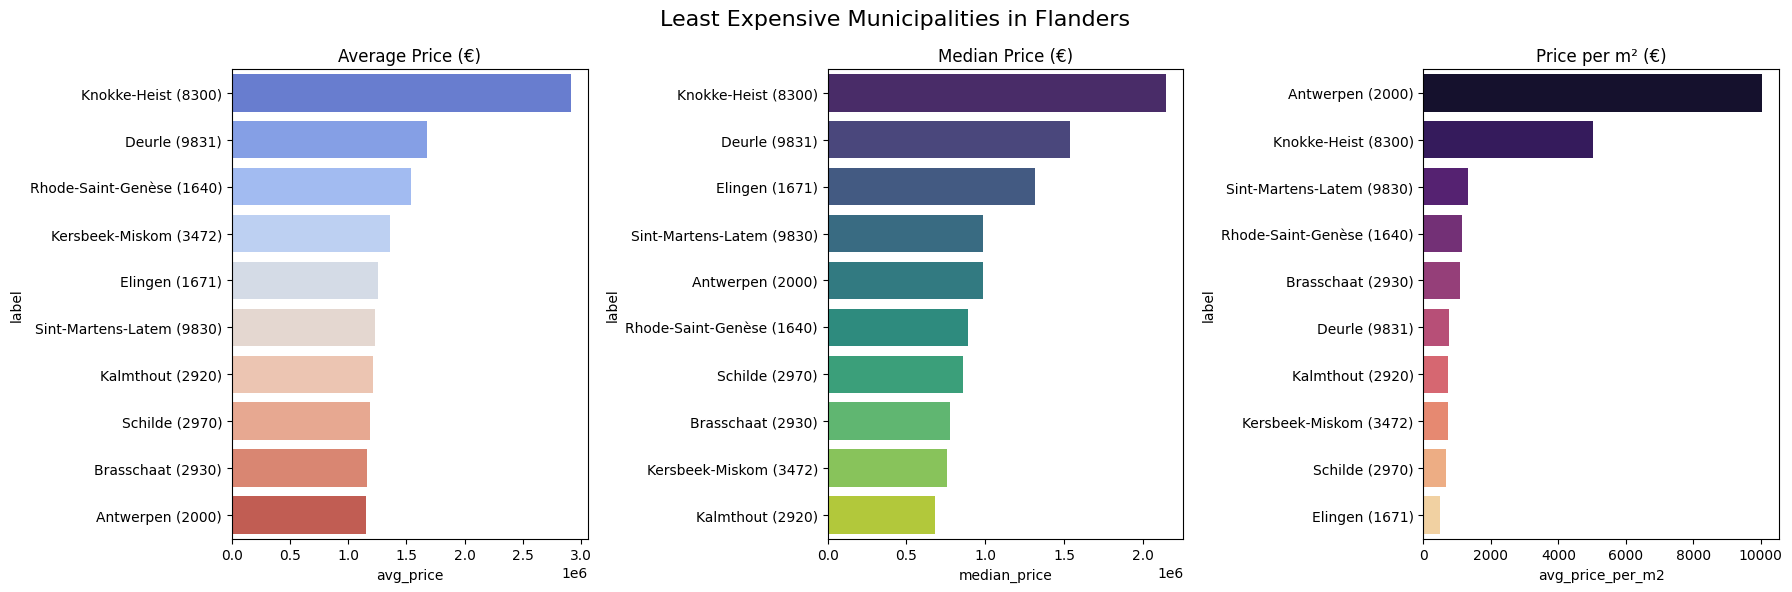

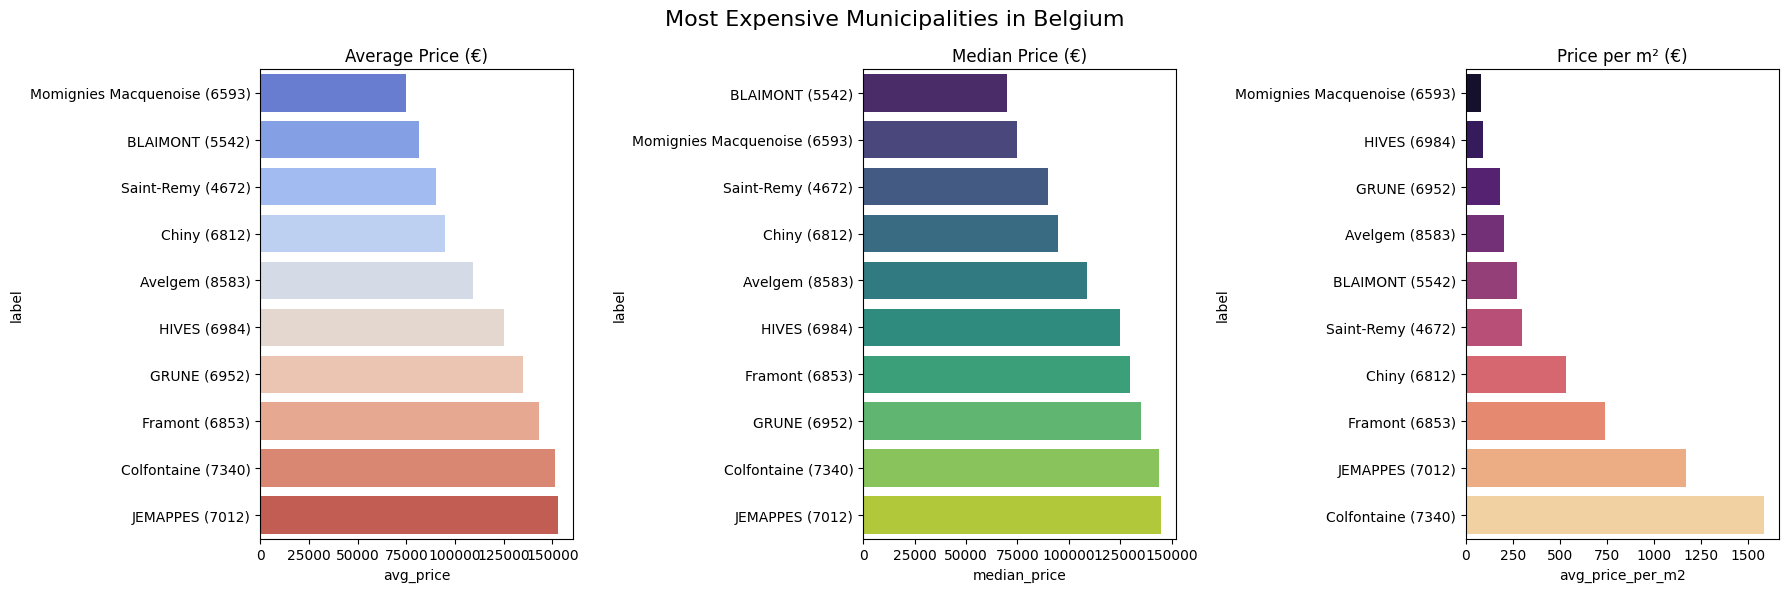

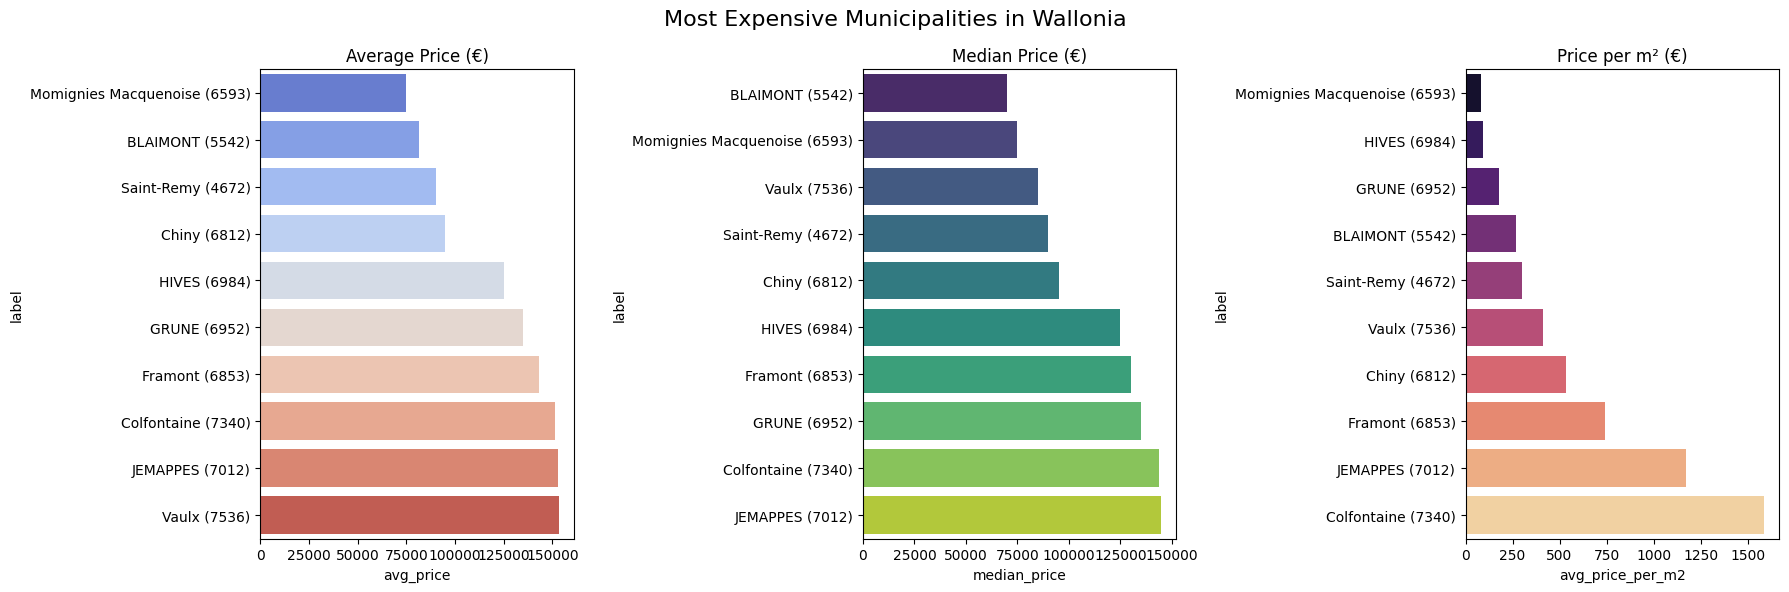

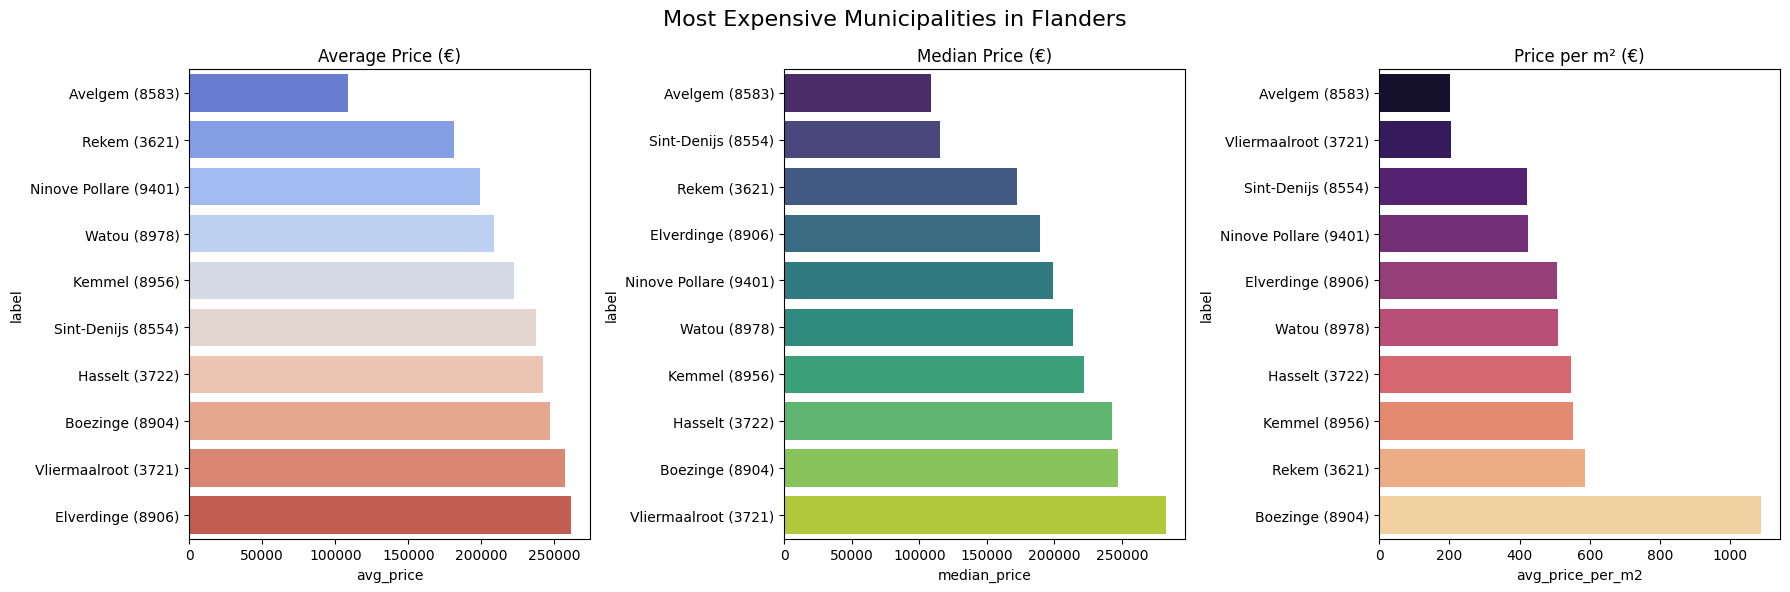

In [52]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = df_cleaned.copy()
df = df.dropna(subset=['price', 'landSurface', 'postCode', 'province'])

df = df[df['landSurface'] > 0]
df['price_per_m2'] = df['price'] / df['landSurface']

wallonia_provinces = ['Hainaut', 'Liège', 'Luxembourg', 'Namur', 'Walloon Brabant']
flanders_provinces = ['Antwerp', 'East Flanders', 'Flemish Brabant', 'Limburg', 'West Flanders']

def get_region(province):
    if province == 'Brussels': return 'Brussels'
    elif province in wallonia_provinces: return 'Wallonia'
    elif province in flanders_provinces: return 'Flanders'

df['region'] = df['province'].apply(get_region)

grouped = df.groupby(['postCode', 'region']).agg(
    avg_price=('price', 'mean'),
    median_price=('price', 'median'),
    avg_price_per_m2=('price_per_m2', 'mean'),
    count=('price', 'count'),
).reset_index()

locality_mode = df.groupby('postCode')['locality'].agg(lambda x: x.mode().iloc[0])
grouped['locality'] = grouped['postCode'].map(locality_mode)

grouped['label'] = grouped.apply(lambda x: f"{x['locality']} ({int(x['postCode'])})", axis=1)


def plot_top_bottom(data, region_filter=None, region_name='Belgium', top=True):
    if region_filter: data = data[data['region'].isin(region_filter)]
    data_sorted = data.sort_values(by='avg_price', ascending=top).head(10)
    avg_sorted = data_sorted.sort_values('avg_price', ascending=top)
    median_sorted = data_sorted.sort_values('median_price', ascending=top)
    m2_sorted = data_sorted.sort_values('avg_price_per_m2', ascending=top)

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"{'Most' if top else 'Least'} Expensive Municipalities in {region_name}", fontsize=16)

    sns.barplot(data=avg_sorted, x='avg_price', y='label', ax=axs[0], palette='coolwarm')
    sns.barplot(data=median_sorted, x='median_price', y='label', ax=axs[1], palette='viridis')
    sns.barplot(data=m2_sorted, x='avg_price_per_m2', y='label', ax=axs[2], palette='magma')
    axs[0].set_title('Average Price (€)')
    axs[1].set_title('Median Price (€)')
    axs[2].set_title('Price per m² (€)')

    plt.tight_layout()
    plt.show()


plot_top_bottom(grouped, region_filter=None, region_name='Belgium', top=True)
plot_top_bottom(grouped, region_filter=['Wallonia'], region_name='Wallonia', top=True)
plot_top_bottom(grouped, region_filter=['Flanders'], region_name='Flanders', top=True)

plot_top_bottom(grouped, region_filter=None, region_name='Belgium', top=False)
plot_top_bottom(grouped, region_filter=['Wallonia'], region_name='Wallonia', top=False)
plot_top_bottom(grouped, region_filter=['Flanders'], region_name='Flanders', top=False)
